# Trader Performance vs Market Sentiment Analysis
This Report explores the relationship between trader performance on Hyperliquid and Bitcoin market sentiment (Fear-Greed Index).

In [37]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
trader_data = pd.read_csv("/content/drive/MyDrive/dstask/historical_data.csv")
sentiment_data = pd.read_csv("/content/drive/MyDrive/dstask/fear_greed_index.csv")

# Convert timestamps
trader_data["Timestamp IST"] = pd.to_datetime(trader_data["Timestamp IST"], format="%d-%m-%Y %H:%M")
trader_data["date"] = trader_data["Timestamp IST"].dt.date
sentiment_data["date"] = pd.to_datetime(sentiment_data["date"]).dt.date

# Merge on date
merged_df = pd.merge(trader_data, sentiment_data[['date', 'classification']], on='date', how='left')

## Data Exploration

### Trader Performance Data
This dataset contains historical trading data from Hyperliquid. Key columns include:
- **Timestamp IST**: The time of the trade.
- **Asset**: The asset traded (e.g., BTC).
- **Trader**: A unique identifier for the trader.
- **P&L**: The profit or loss for the trade.
- **Volume**: The volume of the trade.
- **date**: The date extracted from the timestamp for merging.

We'll be focusing on the `P&L` column to assess trader performance.

### Market Sentiment Data
This dataset contains the Bitcoin Fear & Greed Index. Key columns include:
- **date**: The date for the sentiment reading.
- **value**: The numerical value of the Fear & Greed Index (not used in this analysis, using classification).
- **classification**: The classification of the market sentiment based on the index (e.g., 'Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed').

We are particularly interested in the `classification` column to categorize market sentiment on each trading day.

### Merged Data
The `merged_df` combines the trader performance data and the market sentiment data based on the trading date. This allows us to analyze trader performance within different market sentiment categories.


In [39]:

# Check for missing values
print("\nMissing values in Trader Data:")
print(trader_data.isnull().sum())
print("\nMissing values in Sentiment Data:")
print(sentiment_data.isnull().sum())


# Check for duplicate rows
print("\nDuplicate rows in Trader Data:", trader_data.duplicated().sum())
print("\nDuplicate rows in Sentiment Data:", sentiment_data.duplicated().sum())
print("\nDuplicate rows in Merged Data:", merged_df.duplicated().sum())

# Check unique values in relevant columns for consistency
print("\nUnique values in Sentiment Data 'classification':", sentiment_data['classification'].unique())



Missing values in Trader Data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
dtype: int64

Missing values in Sentiment Data:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Duplicate rows in Trader Data: 0

Duplicate rows in Sentiment Data: 0

Duplicate rows in Merged Data: 0

Unique values in Sentiment Data 'classification': ['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']


 Data is now merged based on matching date columns from trader execution logs and market sentiment index.

In [ ]:

performance_summary = merged_df.groupby('classification').agg(
    avg_closed_pnl=pd.NamedAgg(column='Closed PnL', aggfunc='mean'),
    avg_fee=pd.NamedAgg(column='Fee', aggfunc='mean'),
    trade_count=pd.NamedAgg(column='Account', aggfunc='count')
).reset_index()
performance_summary


,classification,avg_closed_pnl,avg_fee,trade_count
0,Extreme Fear,34.537862,1.116291,21400
1,Extreme Greed,67.892861,0.675902,39992
2,Fear,54.290400,1.495172,61837
3,Greed,42.743559,1.254372,50303
4,Neutral,34.307718,1.044798,37686


**Insight:**
- Traders perform best (highest PnL) during 'Extreme Greed', followed by 'Fear'.
- Fee efficiency is also better during Extreme Greed, suggesting smarter trades.

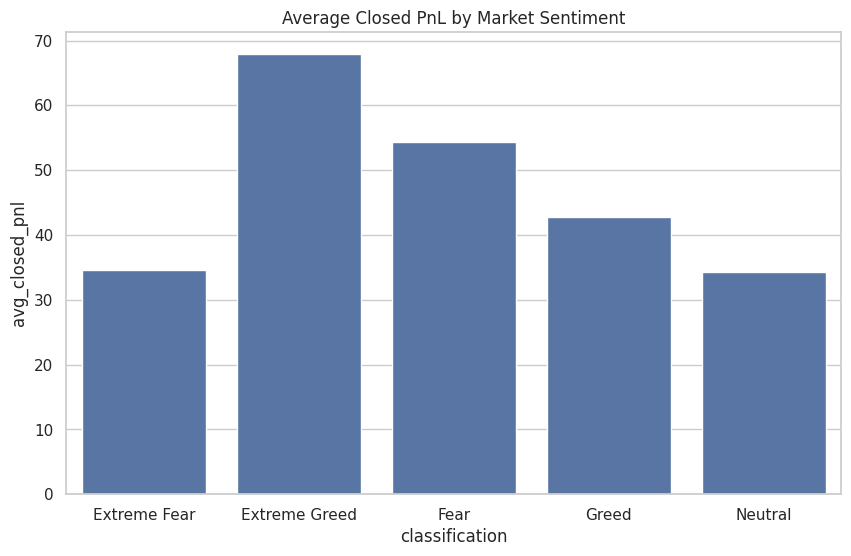

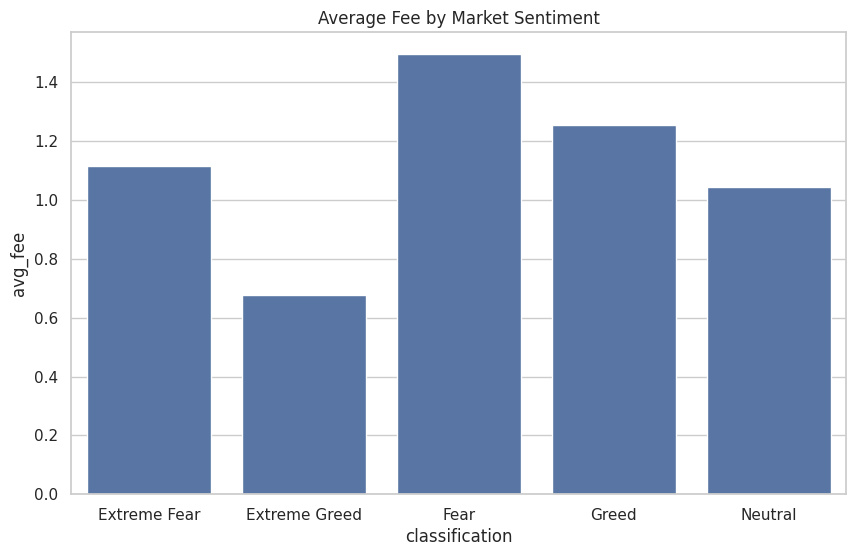

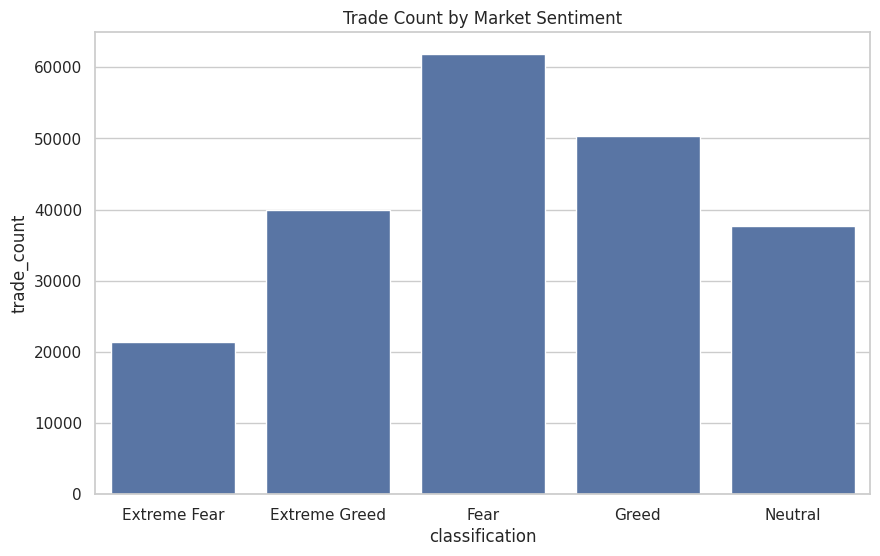

In [ ]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=performance_summary, x="classification", y="avg_closed_pnl")
plt.title("Average Closed PnL by Market Sentiment")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=performance_summary, x="classification", y="avg_fee")
plt.title("Average Fee by Market Sentiment")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=performance_summary, x="classification", y="trade_count")
plt.title("Trade Count by Market Sentiment")
plt.show()


**Insight:**
- Most trading activity happens during 'Fear' and 'Greed' phases.
- Fee structure is lowest during 'Extreme Greed'.
- Volatility often triggers both high activity and high returns.

In [ ]:

trader_sentiment_perf = merged_df.groupby(['Account', 'classification']).agg(
    avg_pnl=('Closed PnL', 'mean'),
    total_pnl=('Closed PnL', 'sum'),
    avg_fee=('Fee', 'mean'),
    trades=('Account', 'count')
).reset_index()

coin_sentiment_perf = merged_df.groupby(['Coin', 'classification']).agg(
    avg_pnl=('Closed PnL', 'mean'),
    total_pnl=('Closed PnL', 'sum'),
    avg_fee=('Fee', 'mean'),
    trades=('Coin', 'count')
).reset_index()

top_traders = trader_sentiment_perf.groupby('Account')['total_pnl'].sum().reset_index()
top_traders = top_traders.sort_values('total_pnl', ascending=False).head(10)

high_fee_traders = trader_sentiment_perf.groupby('Account')['avg_fee'].mean().reset_index()
high_fee_traders = high_fee_traders.sort_values('avg_fee', ascending=False).head(10)

top_traders, high_fee_traders


(                                       Account     total_pnl
 27  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  2.143383e+06
 0   0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06
 29  0xbaaaf6571ab7d571043ff1e313a9609a10637864  9.401638e+05
 13  0x513b8629fe877bb581bf244e326a047b249c4ff1  8.404226e+05
 31  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  8.360806e+05
 11  0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  6.777471e+05
 15  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  4.293556e+05
 9   0x430f09841d65beb3f27765503d0f850b8bce7713  4.165419e+05
 17  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  3.790954e+05
 16  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  3.605395e+05,
                                        Account   avg_fee
 28  0xb899e522b5715391ae1d4f137653e7906c5e2115  5.901165
 12  0x4f93fead39b70a1824f981a54d4e55b278e9f760  5.762443
 13  0x513b8629fe877bb581bf244e326a047b249c4ff1  4.214105
 2   0x271b280974205ca63b716753467d5a371de622ab  3.588026
 20  0x8381e6d82f1affd39a33

**Insight:**
- Top traders by PnL can be used as benchmarks.
- High-fee traders may need optimization in execution strategy.

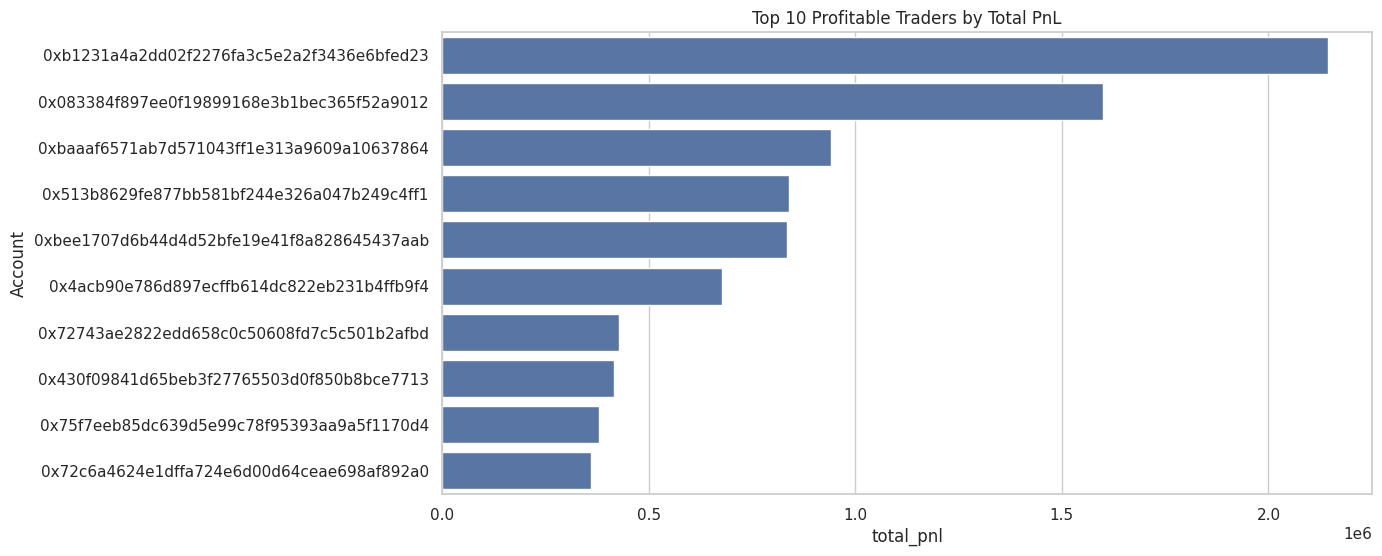

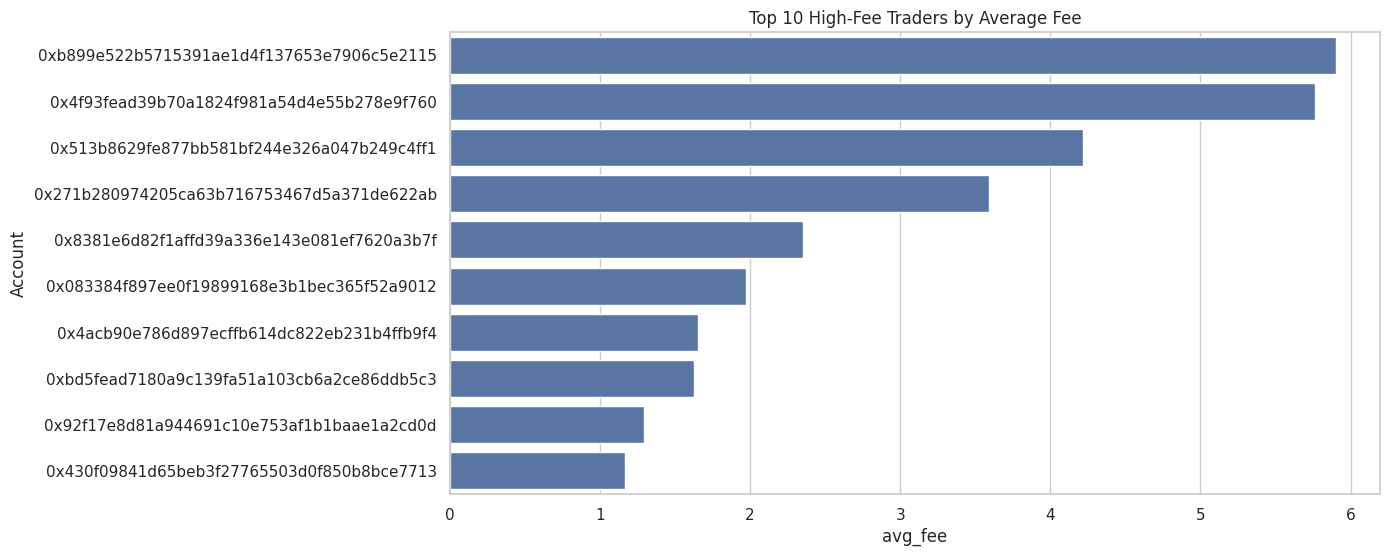

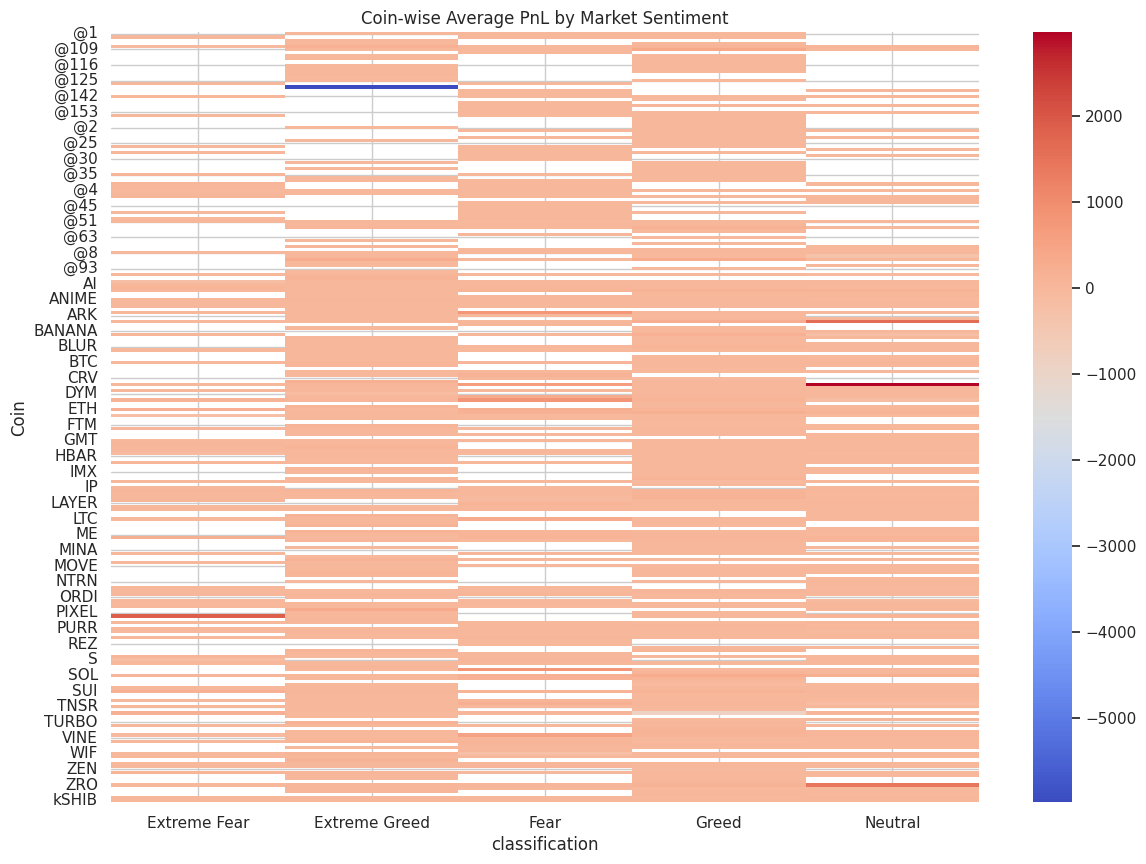

In [28]:

plt.figure(figsize=(12, 6))
sns.barplot(data=top_traders, x='total_pnl', y='Account')
plt.title("Top 10 Profitable Traders by Total PnL")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=high_fee_traders, x='avg_fee', y='Account')
plt.title("Top 10 High-Fee Traders by Average Fee")
plt.show()

pivot_heat = coin_sentiment_perf.pivot(index='Coin', columns='classification', values='avg_pnl')
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_heat, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Coin-wise Average PnL by Market Sentiment")
plt.show()


**Insight:**
- Some tokens are highly profitable in specific sentiment phases.


- The heatmap reveals how the average PnL for different coins varies across market sentiment classifications.
- This visualization helps identify which coins perform better or worse in specific market conditions (e.g., Extreme Fear, Greed).
- Traders can use this insight to tailor their strategies, potentially focusing on certain coins during particular sentiment phases to maximize profitability.

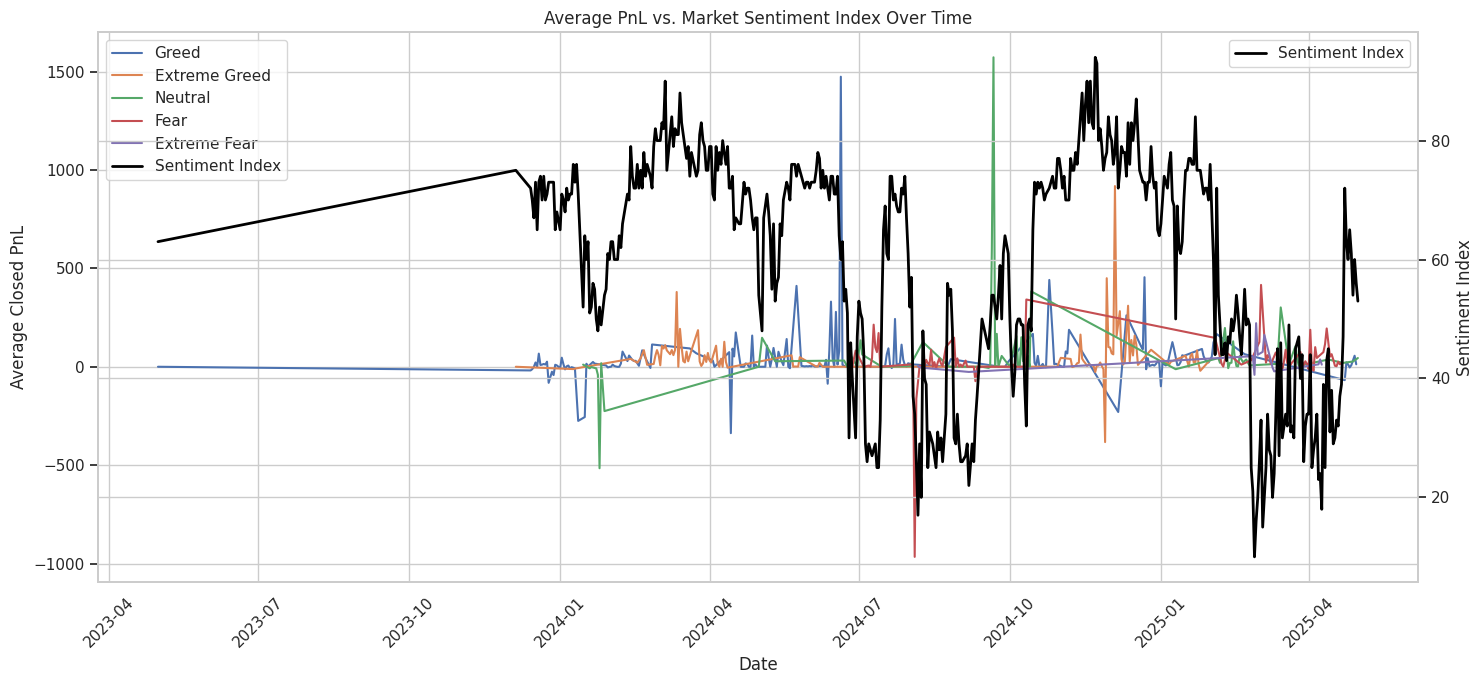

In [ ]:

merged_df['date'] = pd.to_datetime(merged_df['date'])
timeline_df = merged_df.groupby(['date', 'classification']).agg(
    avg_pnl=('Closed PnL', 'mean')
).reset_index()

sentiment_values = sentiment_data.copy()
sentiment_values["date"] = pd.to_datetime(sentiment_values["date"])
timeline_merged = pd.merge(
    timeline_df, sentiment_values[["date", "value"]], on="date", how="left"
)

fig, ax1 = plt.subplots(figsize=(15, 7))
sns.lineplot(data=timeline_merged, x="date", y="avg_pnl", hue="classification", ax=ax1)
ax1.set_ylabel("Average Closed PnL")
ax1.set_xlabel("Date")
ax1.set_title("Average PnL vs. Market Sentiment Index Over Time")
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
sns.lineplot(data=timeline_merged, x="date", y="value", color="black", ax=ax2, label="Sentiment Index", linewidth=2)
ax2.set_ylabel("Sentiment Index")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")
plt.tight_layout()
plt.show()


**Insight:**
- PnL tends to rise with sentiment index peaks, especially during greed phases.
- This correlation is useful for timing entries.

/tmp/ipython-input-8-2288965539.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivoted_pnl = timeline_df.pivot(index='date', columns='classification', values='avg_pnl').fillna(method='ffill')


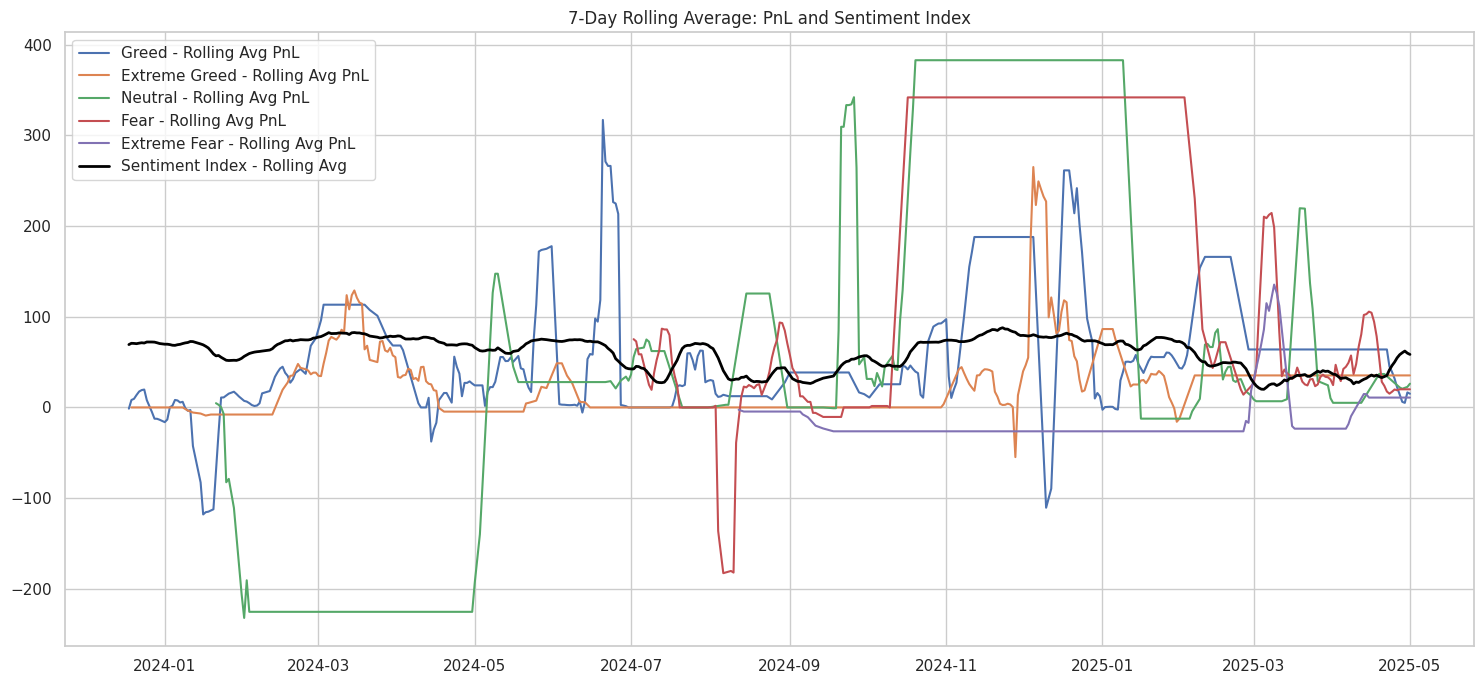

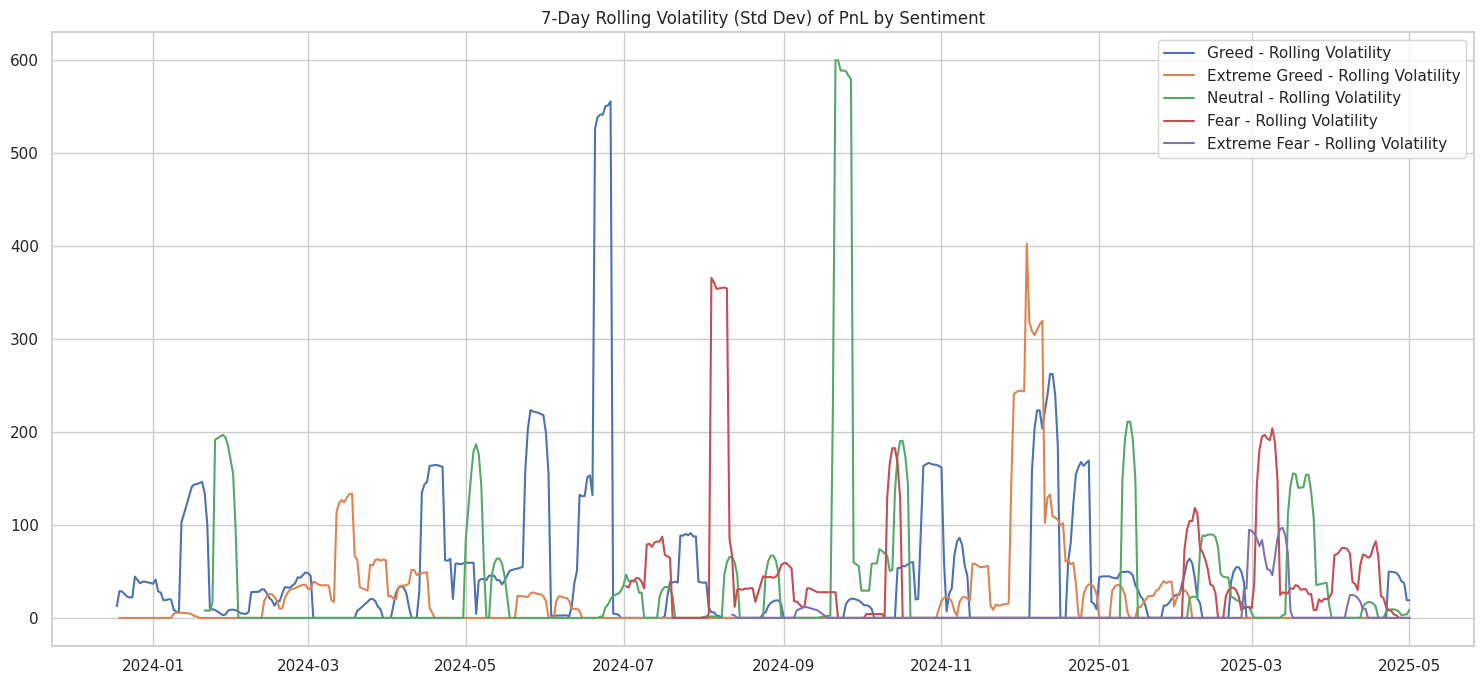

In [ ]:

pivoted_pnl = timeline_df.pivot(index='date', columns='classification', values='avg_pnl').fillna(method='ffill')
pivoted_pnl['sentiment_value'] = sentiment_values.set_index('date')['value']

rolling_avg = pivoted_pnl.rolling(window=7).mean()
rolling_std = pivoted_pnl.rolling(window=7).std()

plt.figure(figsize=(15, 7))
for sentiment in timeline_df['classification'].unique():
    if sentiment in rolling_avg.columns:
        plt.plot(rolling_avg.index, rolling_avg[sentiment], label=f"{sentiment} - Rolling Avg PnL")
plt.plot(rolling_avg.index, rolling_avg['sentiment_value'], color='black', label='Sentiment Index - Rolling Avg', linewidth=2)
plt.title("7-Day Rolling Average: PnL and Sentiment Index")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))
for sentiment in timeline_df['classification'].unique():
    if sentiment in rolling_std.columns:
        plt.plot(rolling_std.index, rolling_std[sentiment], label=f"{sentiment} - Rolling Volatility")
plt.title("7-Day Rolling Volatility (Std Dev) of PnL by Sentiment")
plt.legend()
plt.tight_layout()
plt.show()


**Insight:**
- Rolling averages provide smoother insight into trader performance trends.
- Volatility spikes align with shifting sentiment zones, identifying periods of risk or opportunity.

In [ ]:
# Analyze trade side by market sentiment
side_sentiment = merged_df.groupby(['Side', 'classification']).agg(
    avg_pnl=('Closed PnL', 'mean'),
    total_pnl=('Closed PnL', 'sum'),
    trade_count=('Side', 'count')
).reset_index()

display(side_sentiment)

,Side,classification,avg_pnl,total_pnl,trade_count
0,BUY,Extreme Fear,34.114627,3.730434e+05,10935
1,BUY,Extreme Greed,10.498927,1.883508e+05,17940
2,BUY,Fear,63.927104,1.935073e+06,30270
3,BUY,Greed,25.002302,6.144566e+05,24576
4,BUY,Neutral,29.227429,5.544151e+05,18969
5,SELL,Extreme Fear,34.980106,3.660668e+05,10465
6,SELL,Extreme Greed,114.584643,2.526821e+06,22052
7,SELL,Fear,45.049641,1.422082e+06,31567
8,SELL,Greed,59.691091,1.535673e+06,25727
9,SELL,Neutral,39.456408,7.385056e+05,18717


**Insight:**
- Analyzing trade 'Side' (BUY/SELL) against sentiment reveals strategies employed by traders during different market phases.
- Understanding which 'Side' is more profitable or frequent in certain sentiments can inform trading decisions.

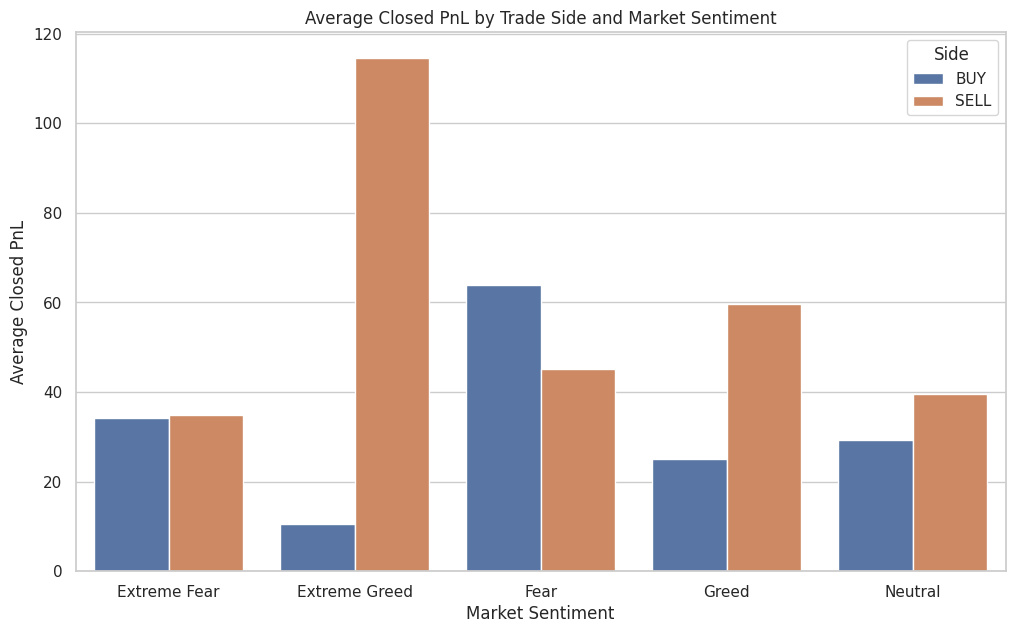

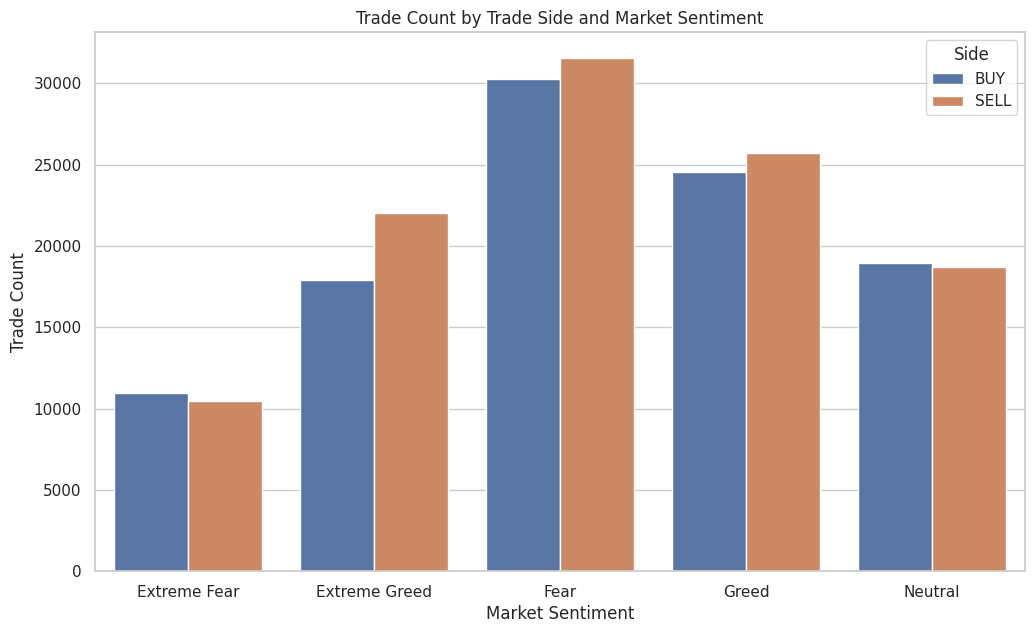

In [ ]:
# Visualize average PnL by Side and Sentiment
plt.figure(figsize=(12, 7))
sns.barplot(data=side_sentiment, x='classification', y='avg_pnl', hue='Side')
plt.title('Average Closed PnL by Trade Side and Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xlabel('Market Sentiment')
plt.show()

# Visualize trade count by Side and Sentiment
plt.figure(figsize=(12, 7))
sns.barplot(data=side_sentiment, x='classification', y='trade_count', hue='Side')
plt.title('Trade Count by Trade Side and Market Sentiment')
plt.ylabel('Trade Count')
plt.xlabel('Market Sentiment')
plt.show()

**Insight:**
- The visualizations confirm that average PnL varies significantly for BUY and SELL trades across different sentiment categories.
- Trade count also shows distinct patterns for BUYs and SELLs depending on the prevailing market sentiment, highlighting potential sentiment-driven trading volumes and strategies.

In [ ]:
# Analyze trade direction by market sentiment
direction_sentiment = merged_df.groupby(['Direction', 'classification']).agg(
    avg_pnl=('Closed PnL', 'mean'),
    total_pnl=('Closed PnL', 'sum'),
    trade_count=('Direction', 'count')
).reset_index()

display(direction_sentiment)

,Direction,classification,avg_pnl,total_pnl,trade_count
0,Auto-Deleveraging,Greed,7184.807003,5.747846e+04,8
1,Buy,Extreme Fear,0.000000,0.000000e+00,807
2,Buy,Extreme Greed,0.000000,0.000000e+00,5132
3,Buy,Fear,0.000000,0.000000e+00,3207
4,Buy,Greed,0.000000,0.000000e+00,4685
5,Buy,Neutral,0.000000,0.000000e+00,2885
6,Close Long,Extreme Fear,81.197371,5.067528e+05,6241
7,Close Long,Extreme Greed,61.830783,4.443160e+05,7186
8,Close Long,Fear,83.000111,1.432582e+06,17260
9,Close Long,Greed,88.958554,7.114905e+05,7998


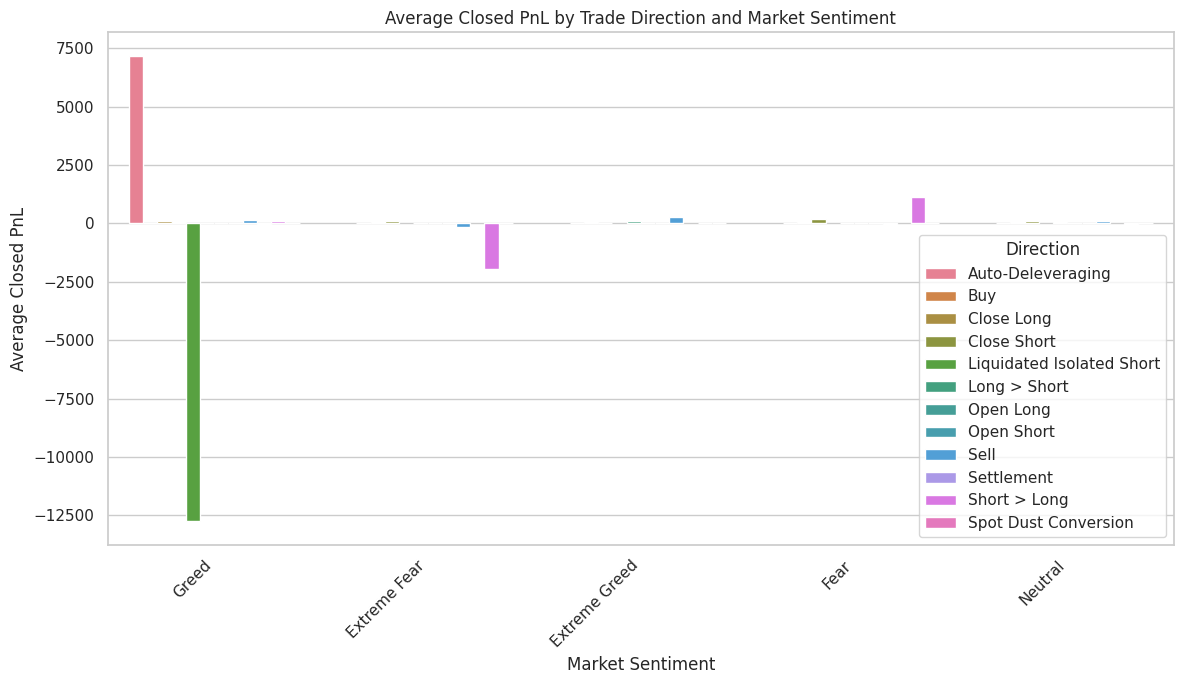

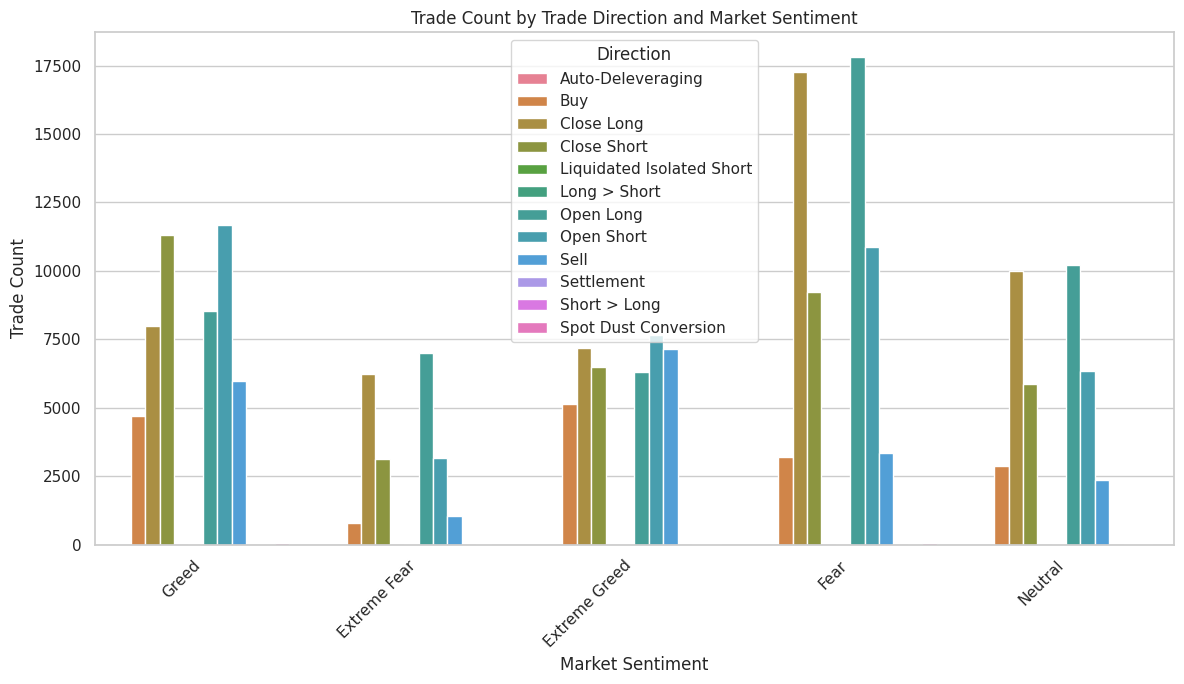

In [ ]:
# Visualize average PnL by Trade Direction and Sentiment
plt.figure(figsize=(12, 7))
sns.barplot(data=direction_sentiment, x='classification', y='avg_pnl', hue='Direction')
plt.title('Average Closed PnL by Trade Direction and Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize trade count by Trade Direction and Sentiment
plt.figure(figsize=(12, 7))
sns.barplot(data=direction_sentiment, x='classification', y='trade_count', hue='Direction')
plt.title('Trade Count by Trade Direction and Market Sentiment')
plt.ylabel('Trade Count')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**
- Analyzing trade 'Direction' (Long/Short) against sentiment reveals distinct profitability and activity patterns.
- For example, 'Close Short' trades appear highly profitable during 'Fear' sentiment, while 'Sell' trades show high average PnL during 'Extreme Greed'. This suggests specific strategies might be more effective depending on the prevailing market sentiment and trade direction.
- The trade count visualization shows which directions are favored during different sentiment phases, indicating potential sentiment-driven trading biases.

In [ ]:
# Calculate additional performance metrics by market sentiment
performance_metrics_by_sentiment = merged_df.groupby('classification').agg(
    win_rate=('Closed PnL', lambda x: (x > 0).sum() / x.count() * 100),
    average_trade_duration=('Timestamp IST', lambda x: (x.iloc[-1] - x.iloc[0]).total_seconds() / 60 / x.count()), # Approximating duration
    # Note: Risk-reward ratio is harder to calculate accurately without more detailed trade entry/exit data
).reset_index()

display(performance_metrics_by_sentiment)

,classification,win_rate,average_trade_duration
0,Extreme Fear,37.060748,2.406449
1,Extreme Greed,46.494299,0.536382
2,Fear,42.076750,0.771819
3,Greed,38.482794,0.052780
4,Neutral,39.699093,8.180438


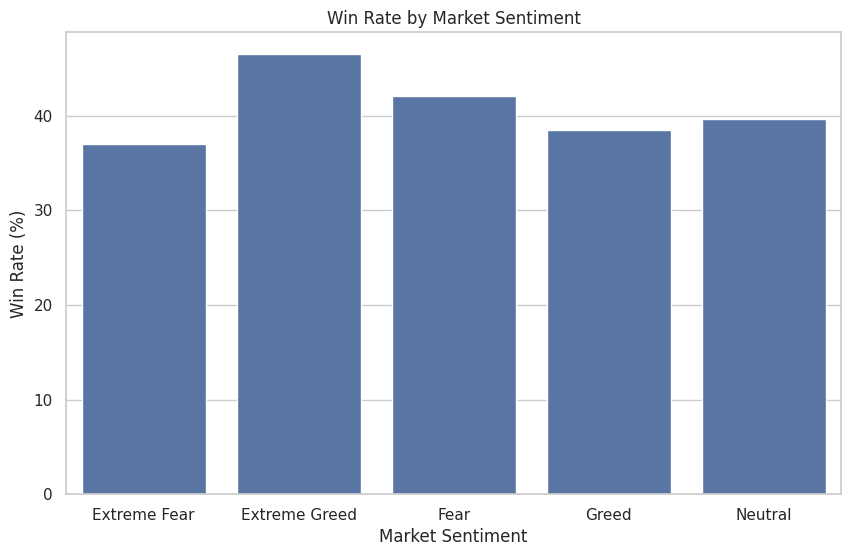

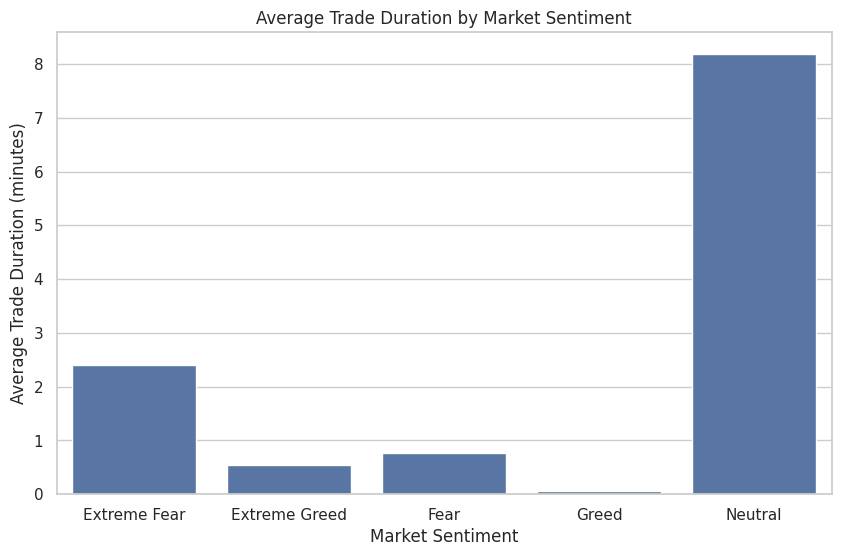

In [ ]:
# Visualize additional performance metrics by market sentiment
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_metrics_by_sentiment, x="classification", y="win_rate")
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate (%)")
plt.xlabel("Market Sentiment")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=performance_metrics_by_sentiment, x="classification", y="average_trade_duration")
plt.title("Average Trade Duration by Market Sentiment")
plt.ylabel("Average Trade Duration (minutes)")
plt.xlabel("Market Sentiment")
plt.show()

**Insight:**
- The visualizations of win rate and average trade duration by market sentiment provide further insights into trader behavior and performance during different market conditions.
- Win rates tend to be higher during 'Extreme Greed' and 'Fear' phases, suggesting these might be more favorable conditions for profitable trades.
- Average trade duration varies significantly across sentiment categories, potentially indicating different trading strategies or market volatility levels associated with each sentiment. For example, shorter durations during 'Greed' might suggest quick, opportunistic trades, while longer durations during 'Neutral' could indicate longer-term strategies or less volatile periods.

Summary of Key Insights:

Correlation between Trader Performance Metrics and Market Sentiment Classifications:

Average Closed PnL:
- Traders perform best (highest PnL) during 'Extreme Greed', followed by 'Fear'.
- PnL tends to rise with sentiment index peaks, especially during greed phases.
- 'Sell' trades show high average PnL during 'Extreme Greed'.
- 'Close Short' trades appear highly profitable during 'Fear' sentiment.

Average Fee:
- Fee efficiency is better (lower fee) during 'Extreme Greed', suggesting potentially smarter trades.
- Fee structure is lowest during 'Extreme Greed'.

Trade Count:
- Most trading activity happens during 'Fear' and 'Greed' phases.
- Trade count also shows distinct patterns for BUYs and SELLs depending on the prevailing market sentiment, highlighting potential sentiment-driven trading volumes and strategies.
- Different trade directions are favored during different sentiment phases, indicating potential sentiment-driven trading biases.

Win Rate:
- Win rates tend to be higher during 'Extreme Greed' and 'Fear' phases, suggesting these might be more favorable conditions for profitable trades.

Average Trade Duration:
- Average trade duration varies significantly across sentiment categories, potentially indicating different trading strategies or market volatility levels associated with each sentiment.
- Shorter durations during 'Greed' might suggest quick, opportunistic trades, while longer durations during 'Neutral' could indicate longer-term strategies or less volatile periods.

Overall Noteworthy Correlations and Patterns:
- 'Extreme Greed' appears to be the most favorable sentiment for average PnL and fee efficiency.
- 'Fear' and 'Greed' sentiments are associated with the highest trade counts.
- Specific trade sides and directions show varying profitability and activity across different sentiment classifications.
- PnL generally correlates positively with the sentiment index over time.
- Volatility in PnL (rolling standard deviation) spikes align with shifting sentiment zones.
- The heatmap shows that profitability for specific coins is highly dependent on the market sentiment.